In [1]:
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")  # for clean visuals


In [2]:
# 2. Load the Cleaned CSV
df = pd.read_csv("C:\MyDirectory\SU\III yr\Sem V\Practical\Industry Connect Course\CSP398 Summer Internship-II\Project\Dataset\cleaned\cleaned_sales_data.csv", parse_dates=["order_date"])

# Inspect
print(df.head())
print(df.info())


   order_id               product  quantity_ordered  price_each  \
0    295665    Macbook Pro Laptop                 1     1700.00   
1    295666    LG Washing Machine                 1      600.00   
2    295667  USB-C Charging Cable                 1       11.95   
3    295668      27in FHD Monitor                 1      149.99   
4    295669  USB-C Charging Cable                 1       11.95   

           order_date                        purchase_address  month    sales  \
0 2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12  1700.00   
1 2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   600.00   
2 2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12    11.95   
3 2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   149.99   
4 2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12    11.95   

             city  hour  day    weekday  
0   New York City     0   30     Monday  
1   New York City     7   

In [13]:
# 3. Null / Data Quality Check
print("Null values per column:\n", df.isnull().sum())


Null values per column:
 order_id            0
product             0
quantity_ordered    0
price_each          0
order_date          0
purchase_address    0
month               0
sales               0
city                0
hour                0
day                 0
weekday             0
dtype: int64


In [14]:
# 4. Total Sales & Quantity
total_sales = df['sales'].sum()
total_quantity = df['quantity_ordered'].sum()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Quantity Ordered: {total_quantity}")


Total Sales: $34,492,035.97
Total Quantity Ordered: 209079


Sales by City:
 city
San Francisco    8262203.91
Los Angeles      5452570.80
New York City    4664317.43
Boston           3661642.01
Atlanta          2795498.58
Dallas           2767975.40
Seattle          2747755.48
Portland         2320490.61
Austin           1819581.75
Name: sales, dtype: float64


C:\Users\ialks\AppData\Local\Temp\ipykernel_24840\211653965.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.index, y=city_sales.values, palette="viridis")


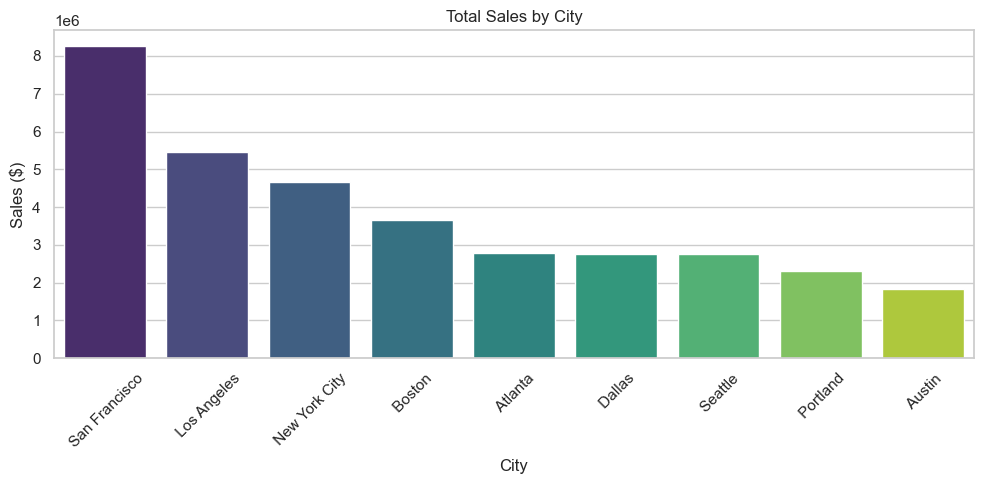

In [15]:
# 5. Sales by City
city_sales = df.groupby('city')['sales'].sum().sort_values(ascending=False)
print("Sales by City:\n", city_sales)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=city_sales.index, y=city_sales.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Total Sales by City")
plt.ylabel("Sales ($)")
plt.xlabel("City")
plt.tight_layout()
plt.show()


Monthly Sales:
 month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: sales, dtype: float64


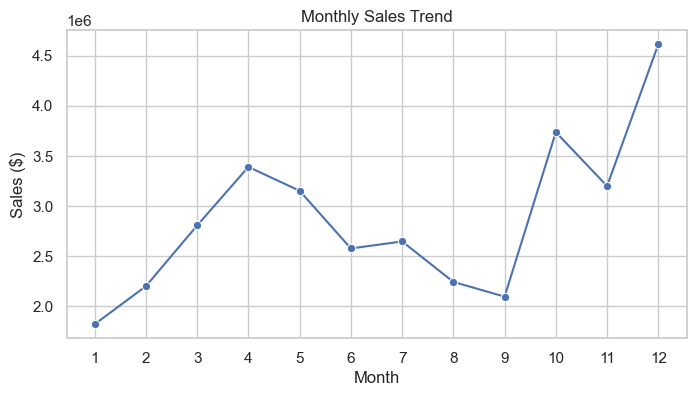

In [16]:
# 6. Monthly Sales
monthly_sales = df.groupby('month')['sales'].sum().sort_index()
print("Monthly Sales:\n", monthly_sales)

plt.figure(figsize=(8,4))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales ($)")
plt.grid(True)
plt.xticks(monthly_sales.index)
plt.show()


C:\Users\ialks\AppData\Local\Temp\ipykernel_24840\47630682.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")


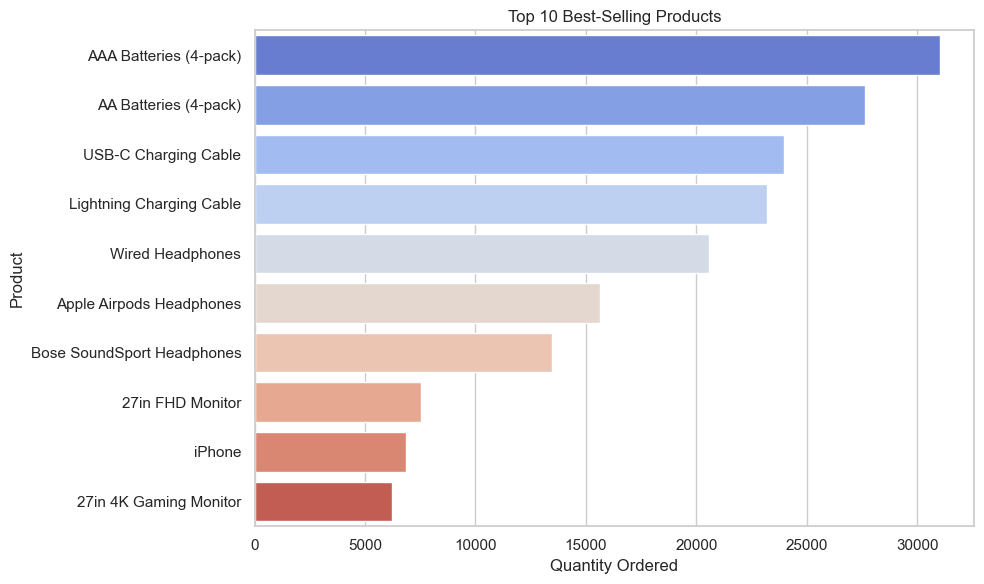

In [8]:
top_products = df.groupby('product')['quantity_ordered'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Quantity Ordered")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


Sales by Hour:
 hour
0      713721.27
1      460866.88
2      234851.44
3      145757.89
4      162661.01
5      230679.82
6      448113.00
7      744854.12
8     1192348.97
9     1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: sales, dtype: float64


C:\Users\ialks\AppData\Local\Temp\ipykernel_24840\4263233531.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_sales.index, y=hourly_sales.values, palette="magma")


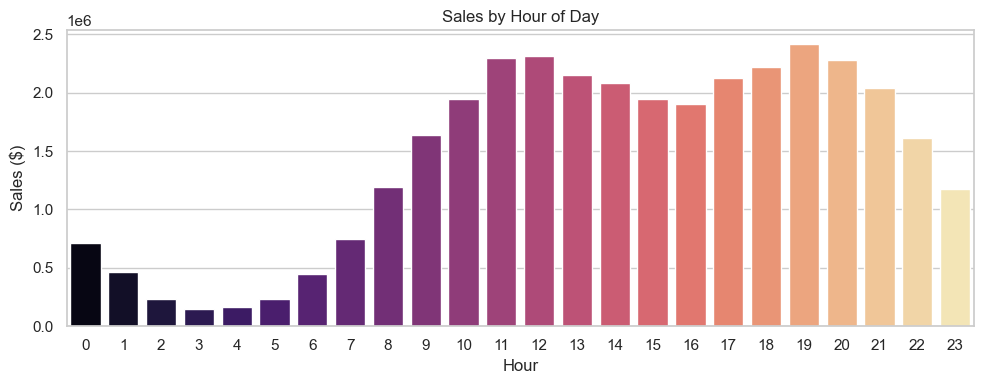

In [17]:
# 7. Hourly Sales (Peak Times)
hourly_sales = df.groupby('hour')['sales'].sum().sort_index()
print("Sales by Hour:\n", hourly_sales)

plt.figure(figsize=(10,4))
sns.barplot(x=hourly_sales.index, y=hourly_sales.values, palette="magma")
plt.title("Sales by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Sales ($)")
plt.xticks(hourly_sales.index)
plt.tight_layout()
plt.show()


Sales by Weekday:
 weekday
Monday       4883326.72
Tuesday      5087956.78
Wednesday    4988822.26
Thursday     4839465.16
Friday       4855938.38
Saturday     4904357.01
Sunday       4932169.66
Name: sales, dtype: float64


C:\Users\ialks\AppData\Local\Temp\ipykernel_24840\3295521290.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="cubehelix")


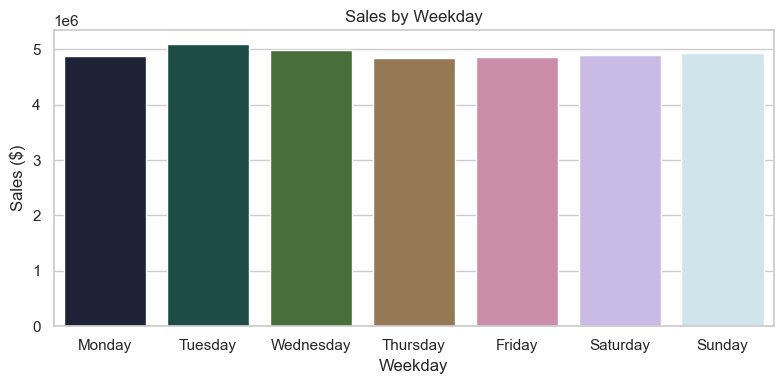

In [18]:
# 8. Weekday Sales
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales = df.groupby('weekday')['sales'].sum().reindex(weekday_order)
print("Sales by Weekday:\n", weekday_sales)

plt.figure(figsize=(8,4))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="cubehelix")
plt.title("Sales by Weekday")
plt.ylabel("Sales ($)")
plt.xlabel("Weekday")
plt.tight_layout()
plt.show()


Top Products by Quantity:
 product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
Name: quantity_ordered, dtype: int64


C:\Users\ialks\AppData\Local\Temp\ipykernel_24840\1938574885.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_qty.values, y=top_products_qty.index, palette="coolwarm")


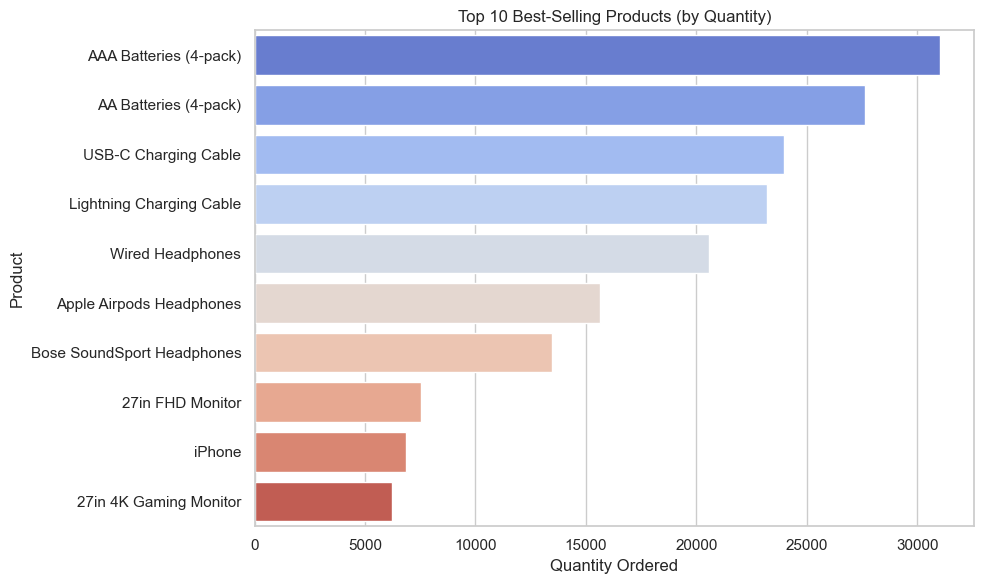

In [19]:
# 9. Top 10 Products by Quantity
top_products_qty = df.groupby('product')['quantity_ordered'].sum().sort_values(ascending=False).head(10)
print("Top Products by Quantity:\n", top_products_qty)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products_qty.values, y=top_products_qty.index, palette="coolwarm")
plt.title("Top 10 Best-Selling Products (by Quantity)")
plt.xlabel("Quantity Ordered")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


Top Products by Sales:
 product
Macbook Pro Laptop            8037600.00
iPhone                        4794300.00
ThinkPad Laptop               4129958.70
Google Phone                  3319200.00
27in 4K Gaming Monitor        2435097.56
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2349150.00
Flatscreen TV                 1445700.00
Bose SoundSport Headphones    1345565.43
27in FHD Monitor              1132424.50
Name: sales, dtype: float64


C:\Users\ialks\AppData\Local\Temp\ipykernel_24840\2561994323.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_sales.values, y=top_products_sales.index, palette="rocket")


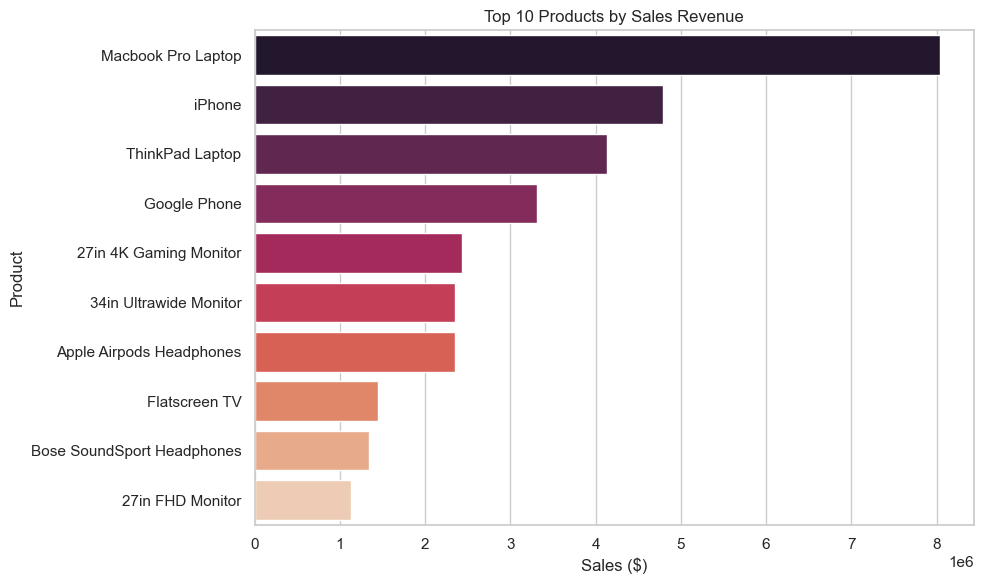

In [20]:
# 10. Top 10 Products by Revenue
top_products_sales = df.groupby('product')['sales'].sum().sort_values(ascending=False).head(10)
print("Top Products by Sales:\n", top_products_sales)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products_sales.values, y=top_products_sales.index, palette="rocket")
plt.title("Top 10 Products by Sales Revenue")
plt.xlabel("Sales ($)")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


In [21]:
# 11. Top 5 Purchase Addresses
top_addresses = df['purchase_address'].value_counts().head(5)
print("Top 5 Purchase Addresses:\n", top_addresses)


Top 5 Purchase Addresses:
 purchase_address
193 Forest St, San Francisco, CA 94016      9
279 Sunset St, San Francisco, CA 94016      8
223 Elm St, Los Angeles, CA 90001           8
662 Chestnut St, San Francisco, CA 94016    7
716 5th St, San Francisco, CA 94016         7
Name: count, dtype: int64
